In [ ]:
# Specific for MacOS
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Training a network "by hand"
In this first section, we create a network without the use of deep learning libraries. The formulas here correspond 1-to-1 to the slides on "Backpropagation: calculation".

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Epoch 1000/10000, Loss: 0.235451
Epoch 2000/10000, Loss: 0.176744
Epoch 3000/10000, Loss: 0.087909
Epoch 4000/10000, Loss: 0.035836
Epoch 5000/10000, Loss: 0.017730
Epoch 6000/10000, Loss: 0.010488
Epoch 7000/10000, Loss: 0.006992
Epoch 8000/10000, Loss: 0.005054
Epoch 9000/10000, Loss: 0.003867
Epoch 10000/10000, Loss: 0.003084

Final outputs after training:
[[0.08759754 0.06790257]
 [0.05590924 0.96801081]
 [0.96702259 0.04405641]
 [0.94761701 0.95035908]]


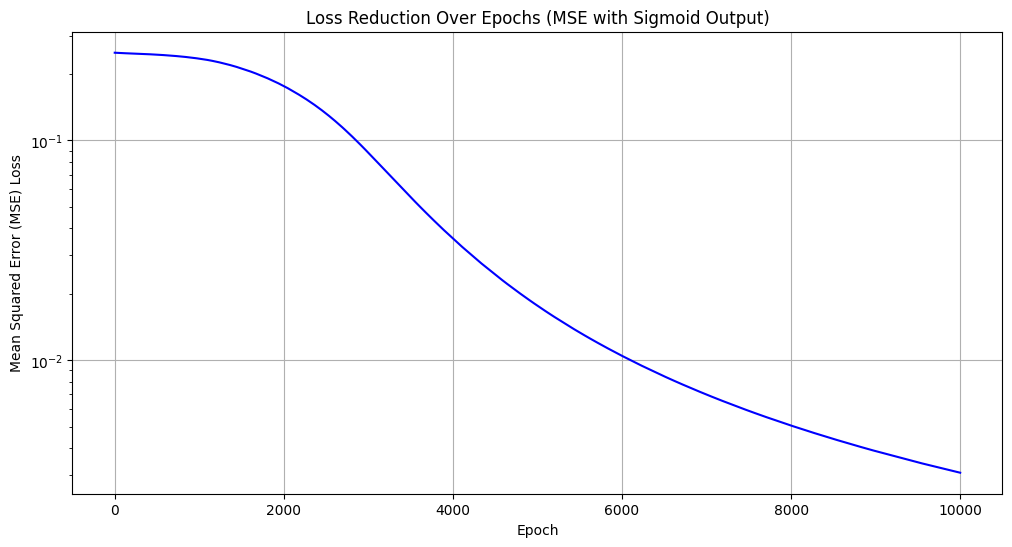

In [ ]:
# Seed for reproducibility
np.random.seed(42)

# Network architecture
input_size = 2
hidden_size = 8  # Increased number of hidden neurons for better capacity
output_size = 2
L = 2  # Total number of layers (excluding input layer)

# Standard Random Initialization (small random values)
def random_initialization(size_in, size_out):
    return np.random.randn(size_in, size_out) * 0.1  # Scaling factor

# Initialize weights and biases
W1 = random_initialization(input_size, hidden_size)  # w^{[1]}
b1 = np.zeros((1, hidden_size))                      # b^{[1]}
W2 = random_initialization(hidden_size, output_size) # w^{[2]}
b2 = np.zeros((1, output_size))                      # b^{[2]}

# Activation Functions and their derivatives
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Forward Pass
def forward_pass(X):
    global z1, a1, z2, a2
    # Layer 1 (Hidden Layer)
    z1 = np.dot(X, W1) + b1          # z^{[1]} = W^{[1]} X + b^{[1]}
    a1 = relu(z1)                    # a^{[1]} = Φ^{[1]}(z^{[1]})

    # Layer 2 (Output Layer)
    z2 = np.dot(a1, W2) + b2         # z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}
    a2 = sigmoid(z2)                 # a^{[2]} = Φ^{[2]}(z^{[2]})

    return a2  # Output activations

# Compute Loss (Mean Squared Error)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Backward Pass (Backpropagation) following lecture formulas
def backward_pass(X, y_true, learning_rate=0.01):
    global W1, b1, W2, b2
    m = y_true.shape[0]  # Number of samples

    # =============================
    # Output Layer Gradients (Layer L)
    # =============================

    # 1. Compute ∂C0/∂a^{[L]} = 2(a^{[L]} - y)
    dC_daL = 2 * (a2 - y_true)  # Shape: (m, output_size)

    # 2. Compute ∂a^{[L]}/∂z^{[L]} = Φ'^{[L]}(z^{[L]})
    d_aL_dzL = sigmoid_derivative(z2)  # Shape: (m, output_size)

    # 3. Compute ∂C0/∂z^{[L]} = ∂C0/∂a^{[L]} * ∂a^{[L]}/∂z^{[L]}
    dC_dzL = dC_daL * d_aL_dzL  # Shape: (m, output_size)

    # 4. Compute ∂C0/∂w^{[L]} = (a^{[L-1]})^T * ∂C0/∂z^{[L]} / m
    dC_dwL = np.dot(a1.T, dC_dzL) / m  # Shape: (hidden_size, output_size)

    # 5. Compute ∂C0/∂b^{[L]} = sum over samples of ∂C0/∂z^{[L]} / m
    dC_dbL = np.sum(dC_dzL, axis=0, keepdims=True) / m  # Shape: (1, output_size)

    # =============================
    # Hidden Layer Gradients (Layer L-1)
    # =============================

    # 6. Compute ∂C0/∂a^{[L-1]} = ∂C0/∂z^{[L]} * (w^{[L]})^T
    dC_daL_minus1 = np.dot(dC_dzL, W2.T)  # Shape: (m, hidden_size)

    # 7. Compute ∂a^{[L-1]}/∂z^{[L-1]} = Φ'^{[L-1]}(z^{[L-1]})
    d_aL_minus1_dzL_minus1 = relu_derivative(z1)  # Shape: (m, hidden_size)

    # 8. Compute ∂C0/∂z^{[L-1]} = ∂C0/∂a^{[L-1]} * ∂a^{[L-1]}/∂z^{[L-1]}
    dC_dzL_minus1 = dC_daL_minus1 * d_aL_minus1_dzL_minus1  # Shape: (m, hidden_size)

    # 9. Compute ∂C0/∂w^{[L-1]} = (a^{[L-2]})^T * ∂C0/∂z^{[L-1]} / m
    # Note: a^{[L-2]} is the input X
    dC_dwL_minus1 = np.dot(X.T, dC_dzL_minus1) / m  # Shape: (input_size, hidden_size)

    # 10. Compute ∂C0/∂b^{[L-1]} = sum over samples of ∂C0/∂z^{[L-1]} / m
    dC_dbL_minus1 = np.sum(dC_dzL_minus1, axis=0, keepdims=True) / m  # Shape: (1, hidden_size)

    # =============================
    # Update Weights and Biases
    # =============================

    # Update weights and biases for Output Layer (Layer L)
    W2 -= learning_rate * dC_dwL
    b2 -= learning_rate * dC_dbL

    # Update weights and biases for Hidden Layer (Layer L-1)
    W1 -= learning_rate * dC_dwL_minus1
    b1 -= learning_rate * dC_dbL_minus1

# Sample Training Data (Identity Function)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Training Parameters
epochs = 10000
learning_rate = 0.01

# Lists to store loss values
loss_history = []
output_history = []

for epoch in range(epochs):
    # Forward pass
    a2 = forward_pass(X)

    # Keep track of the output history
    # if (epoch + 1) % 1000 == 0:
    output_history.append(a2)

    # Compute loss
    loss = compute_loss(y, a2)
    loss_history.append(loss)

    # Backward pass and update
    backward_pass(X, y, learning_rate)

    # Print loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")

# Testing the Trained Network
a2 = forward_pass(X)
print("\nFinal outputs after training:")
print(a2)

# Plotting the Loss Curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), loss_history, color='blue')
plt.title("Loss Reduction Over Epochs (MSE with Sigmoid Output)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.yscale('log')  # Logarithmic scale for better visualization
plt.grid(True)
plt.show()

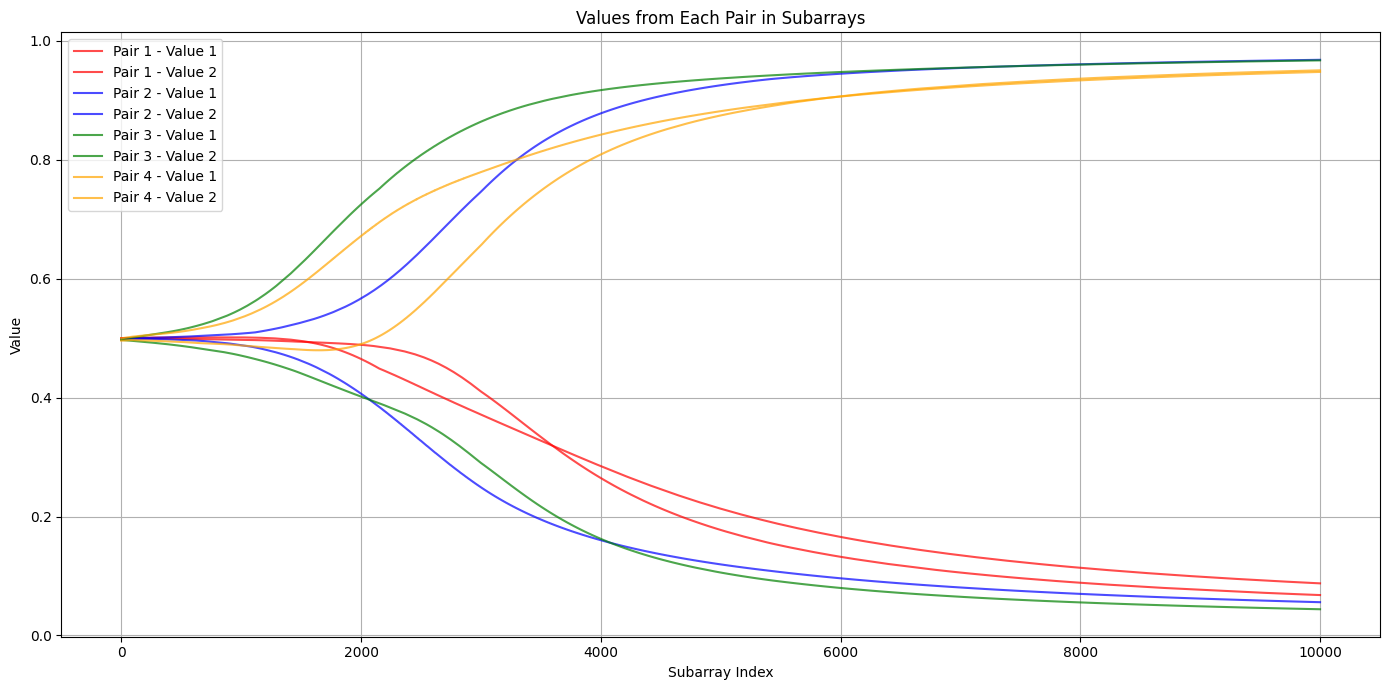

In [ ]:
# Flatten each subarray from (4, 2) to (8,)
flattened_data = np.array([subarray.flatten() for subarray in output_history])  # Shape: (100, 8)

# Create the x-axis values (subarray indices)
x = np.arange(len(flattened_data))  # From 0 to 99

# Define colors for each pair (4 pairs)
# You can choose any colors you prefer
pair_colors = ['red', 'blue', 'green', 'orange']

# Create a list of colors for all 8 lines based on their pair
# Each pair has two consecutive lines sharing the same color
colors = []
for pair_idx in range(4):
    colors.extend([pair_colors[pair_idx]] * 2)  # Repeat each color twice

# Verify the colors list has 8 colors
assert len(colors) == 8, "Colors list should have 8 entries for 8 lines."

# Plotting
plt.figure(figsize=(14, 7))

for i in range(flattened_data.shape[1]):  # 0 to 7
    plt.plot(
        x,
        flattened_data[:, i],
        label=f'Pair {i//2 + 1} - Value {i%2 + 1}',
        color=colors[i],
        alpha=0.7
    )

plt.xlabel('Subarray Index')
plt.ylabel('Value')
plt.title('Values from Each Pair in Subarrays')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training a network using the keras library
In this exercise session, we will (1) attempt to classify some data using a neural network, (2) perform image classification using a predefined network, and (3) train our own convolutional neural network.

We will rely on the `keras` library for doing all the hard work, and a combination of `scikit-learn` and `keras` for the data preprocessing (normalising, splitting in training and test sets, etc).

From the Keras website at https://keras.io:

<blockquote>
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.
<br/><br/>
Keras is:
<br/>
* Simple -- but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.<br/>
* Flexible -- Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.<br/>
* Powerful -- Keras provides industry-strength performance and scalability: it is used by organizations and companies including NASA, YouTube, or Waymo.
</blockquote>

The "First contact" section on that page describes that "The core data structures of Keras are layers and models. The simplest type of model is the **Sequential model**, a linear stack of layers.". Below is a relatively minimal example.

* We specify the type of model (in our case, this will be `Sequential`, because we will be creating simple networks that go "from left to right" without loops etc).
* We add different layers, specifying the type, number of neurons, and activation function.
* We compile the model, specifying the loss function and metrics used to check how it is doing.
* We train the model on the training data.
* We calculate the accuracy using the test data.


In code, that looks like this:

```python
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (given that X_train and y_train are defined)
training = model.fit(X_train, y_train, epochs=180, verbose=True)

# Check accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(accuracy)

```

In addition, we can also plot the change in accuracy across the epochs:

```python
pd.DataFrame(training.history['accuracy']).plot(figsize=(8,5))
```

In the sequential model described above, we have an input layer with 8 neurons, which is fully connected to a first hidden layer of 500 neurons. The connection between input and first layer is implicit by adding the `input_dim` to that layer. This first hidden layer is fully connected to a second hidden layer with 100 neurons, which is connected to a third one with 50 neurons. All layers use the ReLU activation function. Finally, these are passed to the output layer containing 2 neurons (representing e.g. "dog" and "cat"). When we have a classification network (as in this case), we need to use the `softmax` activation function on the output layer because this will convert that output to probabilities. The label of the classification is then the output neuron with the highest probability.

When we create a convolutional neural network, we add convolutional and pooling layers in the beginning of the model.

The people at DataCamp have created a **keras cheatsheet**, which is available at https://images.datacamp.com/image/upload/v1660903348/Keras_Cheat_Sheet_gssmi8.pdf. Keep this cheatsheet handy, because it lists minimal pipelines (e.g. for MLP) and parameters.

## 1. Multi-layer perceptron

In this first section on multi-layer perceptrons, we will work on
1. the dry bean dataset comprising the _description_ of each bean using features; not the images themselves
2. the MNIST hand-written digit dataset. These are 28x28 pixel images, but we will not treat them as images; we'll look at them as an array of numbers (i.e. grey value for each pixel)

### 1.1 Dry bean dataset
In the exercise session on machine learning, we classified dry beans into one of 7 classes. In _this_ session, we will attempt the same but using a simple neural network.

As a reminder, here is a description of the dataset:

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0168169919311573-gr3.jpg" width=500px />

The beans dataset can be retrieved from https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset and contains descriptions of 13,611 images of 7 different beans. These descriptions cover the following 16 features:

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

_Reference: Koklu M and Ozkan IA (2020) “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture 174:105507._

The data table looks like this:

<div style="font-size: xx-small;">

| Area | Perimeter | MajorAxisLength | MinorAxisLength | AspectRation | Eccentricity | ConvexArea | EquivDiameter | Extent | Solidity | roundness | Compactness | ShapeFactor1 | ShapeFactor2 | ShapeFactor3 | ShapeFactor4 | Class |
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
| 28395 | 610.291 | 208.1781167 | 173.888747 | 1.197191424 | 0.549812187 | 28715 | 190.1410973 | 0.763922518 | 0.988855999 | 0.958027126 | 0.913357755 | 0.007331506 | 0.003147289 | 0.834222388 | 0.998723889 | SEKER |
| 28734 | 638.018 | 200.5247957 | 182.7344194 | 1.097356461 | 0.411785251 | 29172 | 191.2727505 | 0.783968133 | 0.984985603 | 0.887033637 | 0.953860842 | 0.006978659 | 0.003563624 | 0.909850506 | 0.998430331 | SEKER |
| 29380 | 624.11 | 212.8261299 | 175.9311426 | 1.209712656 | 0.562727317 | 29690 | 193.4109041 | 0.778113248 | 0.989558774 | 0.947849473 | 0.908774239 | 0.007243912 | 0.003047733 | 0.825870617 | 0.999066137 | SEKER |
| 30008 | 645.884 | 210.557999 | 182.5165157 | 1.153638059 | 0.498615976 | 30724 | 195.4670618 | 0.782681273 | 0.976695743 | 0.903936374 | 0.928328835 | 0.007016729 | 0.003214562 | 0.861794425 | 0.994198849 | SEKER |
| 30140 | 620.134 | 201.8478822 | 190.2792788 | 1.06079802 | 0.333679658 | 30417 | 195.896503 | 0.773098035 | 0.99089325 | 0.984877069 | 0.970515523 | 0.00669701 | 0.003664972 | 0.941900381 | 0.999166059 | SEKER |
| 30279 | 634.927 | 212.5605564 | 181.5101816 | 1.171066849 | 0.52040066 | 30600 | 196.3477022 | 0.775688485 | 0.989509804 | 0.943851783 | 0.923725952 | 0.007020065 | 0.003152779 | 0.853269634 | 0.999235781 | SEKER |
| 30477 | 670.033 | 211.0501553 | 184.0390501 | 1.146768336 | 0.489477894 | 30970 | 196.9886332 | 0.762401501 | 0.984081369 | 0.853079869 | 0.933373552 | 0.006924899 | 0.003242016 | 0.871186188 | 0.999048736 | SEKER |
| 30519 | 629.727 | 212.9967551 | 182.7372038 | 1.165590535 | 0.513759558 | 30847 | 197.1243203 | 0.770681818 | 0.989366875 | 0.967109244 | 0.925480392 | 0.006979152 | 0.003158285 | 0.856513956 | 0.99834456 | SEKER |
| 30685 | 635.681 | 213.5341452 | 183.1571463 | 1.165852108 | 0.51408086 | 31044 | 197.659696 | 0.771561479 | 0.988435769 | 0.954239808 | 0.925658498 | 0.00695891 | 0.00315155 | 0.856843654 | 0.998952981 | SEKER |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |

</div>

In [ ]:
!wget http://aida-lab.be/assets/Dry_Bean_Dataset.csv

--2024-10-15 12:34:31--  http://aida-lab.be/assets/Dry_Bean_Dataset.csv
Resolving aida-lab.be (aida-lab.be)... 217.70.184.38
Connecting to aida-lab.be (aida-lab.be)|217.70.184.38|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://aida-lab.pages.gitlab.kuleuven.be/assets/Dry_Bean_Dataset.csv [following]
--2024-10-15 12:34:31--  https://aida-lab.pages.gitlab.kuleuven.be/assets/Dry_Bean_Dataset.csv
Resolving aida-lab.pages.gitlab.kuleuven.be (aida-lab.pages.gitlab.kuleuven.be)... 134.58.134.50, 2a02:2c40:0:81::81:50
Connecting to aida-lab.pages.gitlab.kuleuven.be (aida-lab.pages.gitlab.kuleuven.be)|134.58.134.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2484759 (2.4M) [text/csv]
Saving to: ‘Dry_Bean_Dataset.csv’

Dry_Bean_Dataset.cs 100%[===================>]   2.37M  --.-KB/s    in 0.07s   

2024-10-15 12:34:32 (31.9 MB/s) - ‘Dry_Bean_Dataset.csv’ saved [2484759/2484759]



First we load the necessary libraries.

In [ ]:
!pip install keras

In [ ]:
import keras
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer

The beans dataset is stored in the file `Dry_Bean_Dataset.csv`. Some of the columns are combinations of others; for example, the compactness `CO` is the equivalent diameter `Ed` divided by the major axis length `L`. We want to get rid of those.

In [ ]:
df_beans_full = pd.read_csv('Dry_Bean_Dataset.csv')

# Remove the features that are combinations of other features
df_beans = df_beans_full[['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','Class']]

# Take a sample of 500
# df_beans = df_beans.sample(n=500)
df_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Class
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,SEKER
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272751,0.783968,0.984986,SEKER
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,SEKER
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,SEKER
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,SEKER
...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,42508,231.515799,0.714574,0.990331,DERMASON
13607,42101,757.499,281.576392,190.713136,0.735702,42494,231.526798,0.799943,0.990752,DERMASON
13608,42139,759.321,281.539928,191.187979,0.734065,42569,231.631261,0.729932,0.989899,DERMASON
13609,42147,763.779,283.382636,190.275731,0.741055,42667,231.653247,0.705389,0.987813,DERMASON


Next, we create the primary input data (`X`) and labels (`y`).

In [ ]:
target_column = ['Class']
predictors = list(set(list(df_beans.columns))-set(target_column))
print(predictors)

X = df_beans[predictors].values
y = df_beans[target_column].values

['Perimeter', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Area', 'MajorAxisLength', 'Solidity', 'MinorAxisLength']


Let's look what `X` and `y` look like.

In [ ]:
print(X.shape)
print(y.shape)

print(type(X))
print(type(y))

print(np.min(X))
print(np.max(X))
print(np.unique(y))

print(X[0:2])
print(y[0:2])

(13611, 9)
(13611, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.218951263
263261.0
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[[6.10291000e+02 5.49812187e-01 2.87150000e+04 1.90141097e+02
  7.63922518e-01 2.83950000e+04 2.08178117e+02 9.88855999e-01
  1.73888747e+02]
 [6.38018000e+02 4.11785251e-01 2.91720000e+04 1.91272751e+02
  7.83968133e-01 2.87340000e+04 2.00524796e+02 9.84985603e-01
  1.82734419e+02]]
[['SEKER']
 ['SEKER']]


This shows us that we have 13,611 datapoints, with 9 features and 1 label. Both `X` and `y` are numpy arrays. The values for `X` range from 0.219 to 263,261, and we can see the 7 different labels. Finally, we print out the 2 first elements of each array.

We will need to do 2 important things before using this data:

* The labels in `y` are now a single string for each datapoint. However, as we will do classification we will create an output layer with 7 neurons. For a DERMASON bean, all neurons should return a `0` _except_ the one for DERMASON which should be a `1`. In other words, we will need to create a one-hot encoded version of the labels: "DERMASON" becomes `[0,0,0,1,0,0,0]`.
* The input neurons in `X` need to be normalised between `0` and `1`.

We also have to check if all values are floats instead of integers. That is a requirement for numpy.

So we create the one-hot encoding for the labels.

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = keras.utils.to_categorical(y, 7)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**IMPORTANT**: The normalisation of input values should be based on the training data only. When we train the model we in principle do not have any information from the test set. If we would fit the normalisation on the entire dataset (training _and_ test), than there would be information from the test set leaked into the model.

This means we have to split the data in training and test set _before_ normalisation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape); print(X_test.shape)

(10208, 9)
(3403, 9)


In [ ]:
normalizer = Normalizer().fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

print(np.min(X_train))
print(np.max(X_train))

2.038679670258037e-06
0.7360953939159274


The input values are all between 2.04e-6 and 0.74, which is between 0 and 1.

As mentioned in the introduction at the top, we create a very simple `Sequential` ("from left to right") neural network that looks like this:

* input layer of 9 neurons
* fully connected (`Dense`) hidden layer with 200 neurons and `relu` activation
* a second fully connected hidden layer with 200 neurons and `relu` activation
* a fully connected output layer with 7 neurons (because we have 7 classes) and `softmax` activation

The input layer is not added explicitely to the model, but is implicit by adding `input_shape=(9,)` to the first hidden layer.

In [ ]:
model = Sequential()
model.add(Dense(units=200, activation='relu',input_shape=(9,)))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=7, activation='softmax'))
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,407 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,607 (170.34 KB)

 Trainable params: 43,607 (170.34 KB)

 Non-trainable params: 0 (0.00 B)

None


Next we can compile the model and train it. The `keras` API documentation for models gives an overview of the parameters that can be used for both: https://keras.io/api/models/model_training_apis/#compile-method and https://keras.io/api/models/model_training_apis/#fit-method

Different loss functions exist for different purposes. These include (but are not limited to):

* `binary_crossentropy` for binary classification
* `categorical_crossentropy` for multi-class classification
* `mse` (mean squared error) for regression
* ...

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(X_train, y_train, epochs=180, verbose=True)

Epoch 1/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2613 - loss: 1.8464
Epoch 2/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2589 - loss: 1.8256
Epoch 3/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2541 - loss: 1.8239
Epoch 4/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2803 - loss: 1.7367
Epoch 5/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4852 - loss: 1.3116
Epoch 6/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5637 - loss: 1.0830
Epoch 7/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5807 - loss: 0.9997
Epoch 8/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5760 - loss: 0.9716
Epoch 9/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5905 - loss: 0.9394
Epoch 10/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5880 - loss: 0.9308
Epoch 11/180
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5879 - loss: 0.9322
Epoch 12/180
319/319 ━━━━━━━━━━━━━━━━━━━━

Finally, we can evaluate the model by applying it to the test data. We'll print out the loss and accuracy, and print the evolution of the accuracy across the different epochs.

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8022 - loss: 0.4970
Test loss: 0.5
Test accuracy: 0.805


<Axes: >

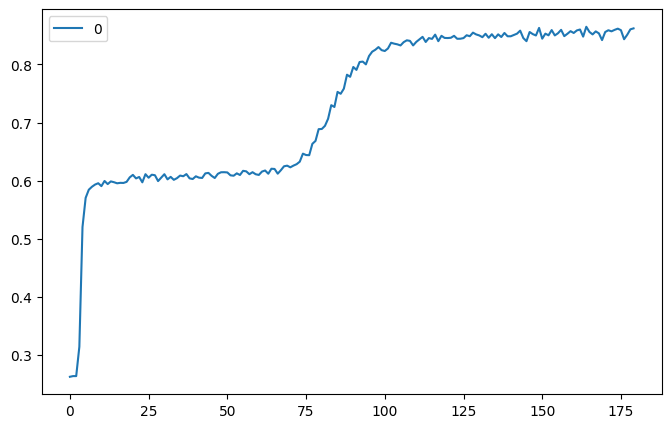

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")
pd.DataFrame(training.history['accuracy']).plot(figsize=(8,5))

In [ ]:
# Reset all variables so that they cannot influence anything below.
%reset -f

### 1.2 MNIST dataset
Another very popular dataset for learning neural networks, is the MNIST dataset. This is a collection of images (28x28 pixels) of hand-written digits.

In this exercise, we will *not* use image recognition yet (a CNN) but a regular feed-forward network (aka multi-layer perceptron). We basically follow the same steps as for the beans dataset above.

In [ ]:
import keras
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from keras.datasets import mnist

The keras library provides several built-in datasets, including MNIST. The documentation at https://keras.io/api/datasets/mnist/ shows us that the dataset has a single function, namely `load_data()`, which returns a tuple of numpy arrays which are the training and test data.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

print(type(X_train))
print(type(y_train))

print(np.min(X_train))
print(np.max(X_train))
print(np.unique(y_train))

print(X_train[0:2])
print(y_train[0:2])

(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0
255
[0 1 2 3 4 5 6 7 8 9]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0]


We see that:

1. there are 60,000 training datapoints, each with 28x28 dimensions (i.e. 784). We will have to convert these 28x28 matrices to a single 784 vector before we can feed it into the MLP.
1. Input values range from 0 to 255, so will have to be rescaled from 0 to 1.
1. The labels in `y` are integers, which we will have to convert to one-hot encoded vectors of length 10 (because there are 10 digits).

First, we just divide all values in the input data by 255 to rescale from 0 to 1.

In [ ]:
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

print(np.min(X_train))
print(np.max(X_train))

0.0
1.0


We convert the output labels to one-hot encoded vectors.

In [ ]:
print(y_train[0:2])

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = le.fit_transform(y_test)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0:2])


[5 0]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Building our model, we still have to convert the 28x28 input matrix to a vector of size 784. We can do this by starting with a `Flatten` layer.

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(X_train, y_train, epochs=30, verbose=True, validation_split=0.01)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4838 - loss: 1.7660 - val_accuracy: 0.7683 - val_loss: 0.9167
Epoch 2/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7770 - loss: 0.8591 - val_accuracy: 0.8267 - val_loss: 0.6434
Epoch 3/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8327 - loss: 0.6291 - val_accuracy: 0.8600 - val_loss: 0.5341
Epoch 4/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8509 - loss: 0.5405 - val_accuracy: 0.8600 - val_loss: 0.4927
Epoch 5/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8614 - loss: 0.4906 - val_accuracy: 0.8717 - val_loss: 0.4682
Epoch 6/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8667 - loss: 0.4676 - val_accuracy: 0.8750 - val_loss: 0.4486
Epoch 7/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8718 - loss: 0.4466 - val_accuracy: 0.8783 - val_loss: 0.4429
Epoch 8/30
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.44

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.4383
Test loss: 0.394
Test accuracy: 0.883


<Axes: >

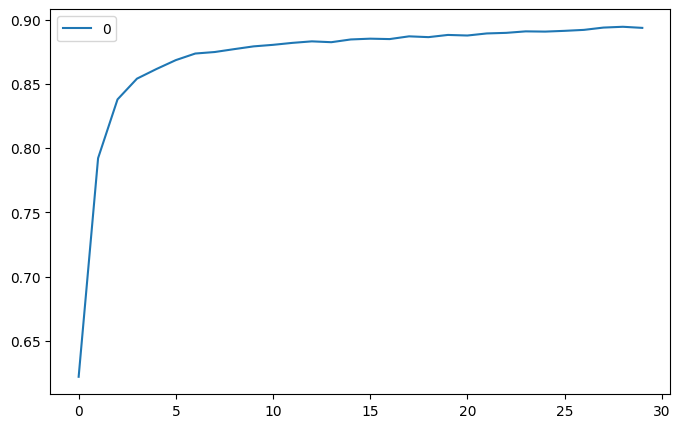

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

pd.DataFrame(training.history['accuracy']).plot(figsize=(8,5))

In [ ]:
%reset -f

## 2. Convolutional Neural Network

Based on https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

### 2.1 MNIST
In exercise 1.2, we classified the MNIST hand-written digits by taking the 28*28=784 pixels as input to 784 neurons. A big disadvantage of doing it this way, is that all locational information is thrown away. Another approach is to treat the images as actual images and use a convolutional neural network.

In [ ]:
import keras
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype('float32')
X_test = X_test / 255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3,3)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
training = model.fit(X_train, y_train, epochs=12, verbose=True, batch_size=500)

Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7087 - loss: 0.9615
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9708 - loss: 0.1090
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9843 - loss: 0.0602
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9889 - loss: 0.0425
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9925 - loss: 0.0313
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9944 - loss: 0.0248
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9957 - loss: 0.0199
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9967 - loss: 0.0163
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9972 - loss: 0.0138
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9986 - loss: 0.0099
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9988 - loss: 0.0086
Epoch 12/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9884 - loss: 0.0334
Test loss: 0.0268
Test accuracy: 0.991


<Axes: >

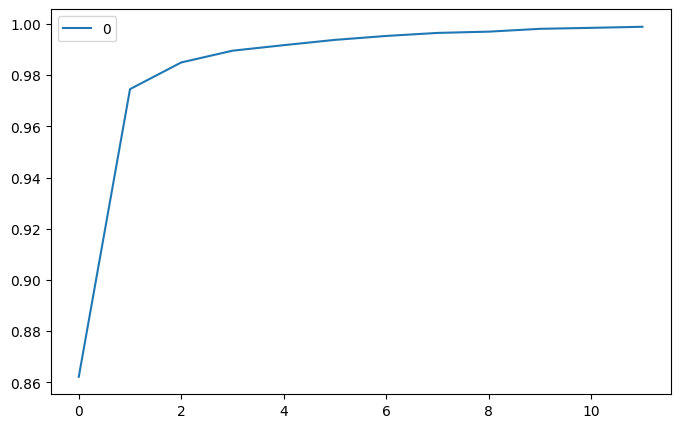

In [ ]:
pd.DataFrame(training.history['accuracy']).plot(figsize=(8,5))

In [ ]:
model.save_weights('cnn_mnist.weights.h5')

What would happen is we tried the following:

* add or remove convolutional layers
* removing dropout layers
* add or remove the fully-connected layer between the convolutional layers and the final output layer
* play with the `Conv2D` parameters (e.g. `strides`,`padding`, and activation)

In [ ]:
%reset -f

#### 2.1.2 Using pre-trained model
We don't have to We have save the model trained on the MNIST data to the file `cnn_mnist.h5`. We don

In [ ]:
!pip install mnist

In [ ]:
import keras
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
# from keras.datasets import mnist
import mnist

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.load_weights('cnn_mnist.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

test_images = X_test
test_labels = y_test

7


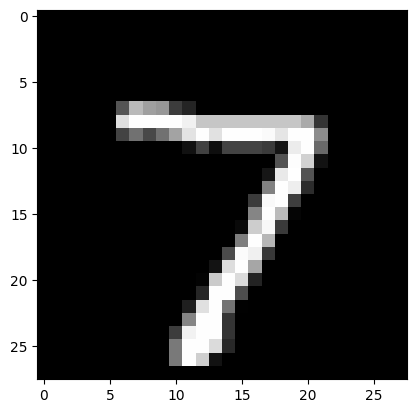

2


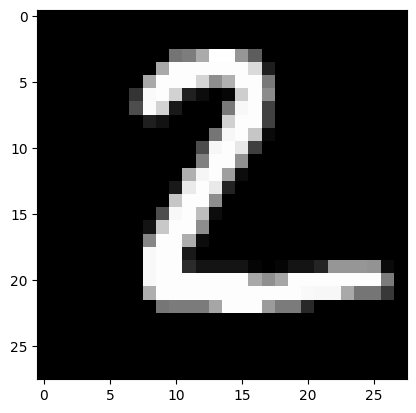

1


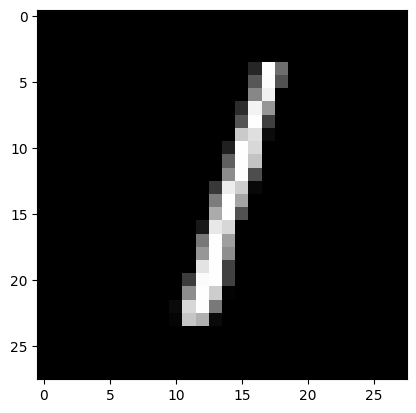

0


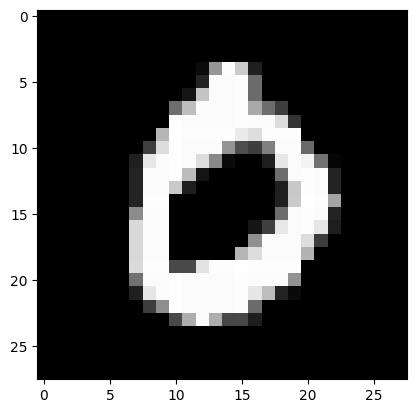

4


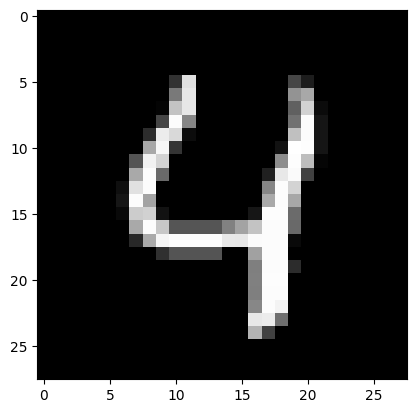

In [ ]:
for i in range(5):
    print(test_labels[i])
    plt.imshow(test_images[i], cmap="gray")
    plt.show()

In [ ]:
predictions = model.predict(test_images[0:5], verbose=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


In [ ]:
print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


In [ ]:
test_labels[:50]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4], dtype=uint8)

In [ ]:
%reset -f